<a href="https://colab.research.google.com/github/ThanadolKl/Mall-Customer-Segmentation-using-K-Means/blob/main/6S_08_Code_Mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [41]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [42]:
pd.isnull(df).sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Cleaning

In [44]:
### drop some columns that are not significant
customer_df = df.drop(columns=['CustomerID', 'Gender'])

In [45]:
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [46]:
#rank_df = customer_df.rank(method='first')

In [47]:
#rank_df = (rank_df - rank_df.mean()) / rank_df.std()

In [48]:
#rank_df['Age']

# Model


In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=6).fit(customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [51]:
kmeans.labels_

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 2, 4, 2, 0,
       5, 4, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [52]:
cluster_df = customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy(deep=True)   ## copy df new variables
cluster_df['Cluster'] = kmeans.labels_  ### assign label

In [53]:
cluster_df

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,5
1,21,15,81,4
2,20,16,6,5
3,23,16,77,4
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [54]:
cluster_df.groupby('Cluster').count()['Annual Income (k$)']

Cluster
0    38
1    39
2    45
3    35
4    22
5    21
Name: Annual Income (k$), dtype: int64

# Plot


In [55]:
kmeans.cluster_centers_ ## Age Income Spending score

array([[27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [44.14285714, 25.14285714, 19.52380952]])

Age VS Spending score

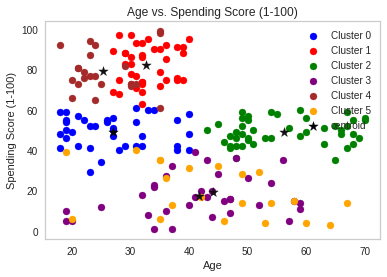

In [56]:
plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 0]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 0]['Spending Score (1-100)'],
    c='blue', label = 'Cluster 0'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 1]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 1]['Spending Score (1-100)'],
    c='red', label = 'Cluster 1'
)


plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 2]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 2]['Spending Score (1-100)'],
    c='green',label = 'Cluster 2'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 3]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 3]['Spending Score (1-100)'],
    c='purple', label = 'Cluster 3'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 4]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 4]['Spending Score (1-100)'],
    c='brown', label = 'Cluster 4'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 5]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 5]['Spending Score (1-100)'],
    c='orange', label = 'Cluster 5'
)




### Plot center of Cluster ###
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][2], c = 'black', marker= "*", s =100, label = 'centroid')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][2], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][2], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][2], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][2], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][2], c = 'k', marker= "*", s = 100)


plt.title('Age vs. Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.legend(loc ="upper right")
plt.legend()
plt.grid()
plt.show()

Age Vs Income

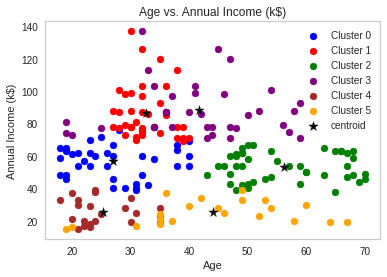

In [57]:
plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 0]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 0]['Annual Income (k$)'],
    c='blue', label = 'Cluster 0'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 1]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 1]['Annual Income (k$)'],
    c='red', label = 'Cluster 1'
)


plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 2]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 2]['Annual Income (k$)'],
    c='green',label = 'Cluster 2'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 3]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 3]['Annual Income (k$)'],
    c='purple', label = 'Cluster 3'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 4]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 4]['Annual Income (k$)'],
    c='brown', label = 'Cluster 4'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 5]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 5]['Annual Income (k$)'],
    c='orange', label = 'Cluster 5'
)




### Plot center of Cluster ###
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], c = 'black', marker= "*", s =100, label = 'centroid')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][1], c = 'k', marker= "*", s = 100)


plt.title('Age vs. Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

plt.legend(loc ="upper right")
plt.legend()
plt.grid()
plt.show()

Income VS Spending

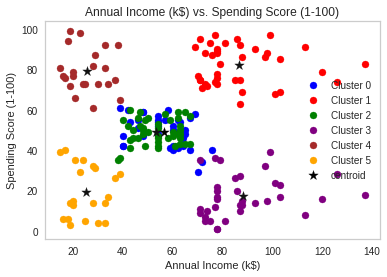

In [58]:
plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 0]['Annual Income (k$)'], 
    cluster_df.loc[cluster_df['Cluster'] == 0]['Spending Score (1-100)'],
    c='blue', label = 'Cluster 0'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 1]['Annual Income (k$)'], 
    cluster_df.loc[cluster_df['Cluster'] == 1]['Spending Score (1-100)'],
    c='red', label = 'Cluster 1'
)


plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 2]['Annual Income (k$)'], 
    cluster_df.loc[cluster_df['Cluster'] == 2]['Spending Score (1-100)'],
    c='green',label = 'Cluster 2'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 3]['Annual Income (k$)'], 
    cluster_df.loc[cluster_df['Cluster'] == 3]['Spending Score (1-100)'],
    c='purple', label = 'Cluster 3'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 4]['Annual Income (k$)'], 
    cluster_df.loc[cluster_df['Cluster'] == 4]['Spending Score (1-100)'],
    c='brown', label = 'Cluster 4'
)

plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 5]['Annual Income (k$)'], 
    cluster_df.loc[cluster_df['Cluster'] == 5]['Spending Score (1-100)'],
    c='orange', label = 'Cluster 5'
)




### Plot center of Cluster ###
plt.scatter(kmeans.cluster_centers_[0][1], kmeans.cluster_centers_[0][2], c = 'black', marker= "*", s =100, label = 'centroid')
plt.scatter(kmeans.cluster_centers_[1][1], kmeans.cluster_centers_[1][2], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[2][1], kmeans.cluster_centers_[2][2], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[3][1], kmeans.cluster_centers_[3][2], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[4][1], kmeans.cluster_centers_[4][2], c = 'k', marker= "*", s = 100)
plt.scatter(kmeans.cluster_centers_[5][1], kmeans.cluster_centers_[5][2], c = 'k', marker= "*", s = 100)


plt.title('Annual Income (k$) vs. Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend(loc ="upper right")
plt.legend()
plt.grid()
plt.show()

# Model 2 5 clusters

In [59]:
cluster_df2 = customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy(deep=True)   ## copy df new variables

In [60]:
model2 = KMeans(n_clusters=5).fit(cluster_df2[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

In [61]:
model2.labels_

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [62]:
cluster_df2 = customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy(deep=True)   ## copy df new variables
cluster_df2['Cluster'] = model2.labels_  ### assign label

In [63]:
cluster_df2

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,0
2,20,16,6,2
3,23,16,77,0
4,31,17,40,2
...,...,...,...,...
195,35,120,79,3
196,45,126,28,4
197,32,126,74,3
198,32,137,18,4


Plot: 5 clusters

In [64]:
model2.cluster_centers_

array([[25.52173913, 26.30434783, 78.56521739],
       [43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333]])

Age VS Spending

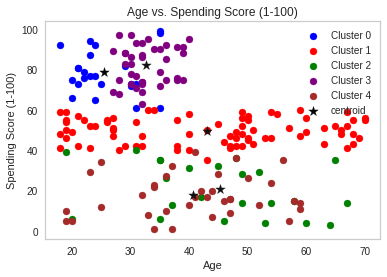

In [65]:
plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 0]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 0]['Spending Score (1-100)'],
    c='blue', label = 'Cluster 0'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 1]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 1]['Spending Score (1-100)'],
    c='red', label = 'Cluster 1'
)


plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 2]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 2]['Spending Score (1-100)'],
    c='green',label = 'Cluster 2'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 3]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 3]['Spending Score (1-100)'],
    c='purple', label = 'Cluster 3'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 4]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 4]['Spending Score (1-100)'],
    c='brown', label = 'Cluster 4'
)





### Plot center of Cluster ###
plt.scatter(model2.cluster_centers_[0][0], model2.cluster_centers_[0][2], c = 'black', marker= "*", s =100, label = 'centroid')
plt.scatter(model2.cluster_centers_[1][0], model2.cluster_centers_[1][2], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[2][0], model2.cluster_centers_[2][2], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[3][0], model2.cluster_centers_[3][2], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[4][0], model2.cluster_centers_[4][2], c = 'k', marker= "*", s = 100)


plt.title('Age vs. Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.legend(loc ="upper right")
plt.legend()
plt.grid()
plt.show()

Age VS Income

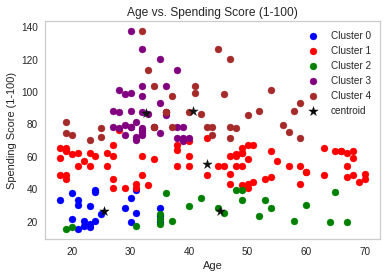

In [66]:
plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 0]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 0]['Annual Income (k$)'],
    c='blue', label = 'Cluster 0'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 1]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 1]['Annual Income (k$)'],
    c='red', label = 'Cluster 1'
)


plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 2]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 2]['Annual Income (k$)'],
    c='green',label = 'Cluster 2'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 3]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 3]['Annual Income (k$)'],
    c='purple', label = 'Cluster 3'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 4]['Age'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 4]['Annual Income (k$)'],
    c='brown', label = 'Cluster 4'
)





### Plot center of Cluster ###
plt.scatter(model2.cluster_centers_[0][0], model2.cluster_centers_[0][1], c = 'black', marker= "*", s =100, label = 'centroid')
plt.scatter(model2.cluster_centers_[1][0], model2.cluster_centers_[1][1], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[2][0], model2.cluster_centers_[2][1], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[3][0], model2.cluster_centers_[3][1], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[4][0], model2.cluster_centers_[4][1], c = 'k', marker= "*", s = 100)


plt.title('Age vs. Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.legend(loc ="upper right")
plt.legend()
plt.grid()
plt.show()

Income VS Spending score

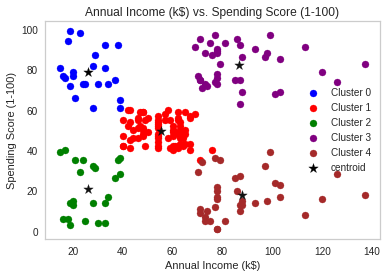

In [67]:
plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 0]['Annual Income (k$)'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 0]['Spending Score (1-100)'],
    c='blue', label = 'Cluster 0'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 1]['Annual Income (k$)'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 1]['Spending Score (1-100)'],
    c='red', label = 'Cluster 1'
)


plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 2]['Annual Income (k$)'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 2]['Spending Score (1-100)'],
    c='green',label = 'Cluster 2'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 3]['Annual Income (k$)'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 3]['Spending Score (1-100)'],
    c='purple', label = 'Cluster 3'
)

plt.scatter(
    cluster_df2.loc[cluster_df2['Cluster'] == 4]['Annual Income (k$)'], 
    cluster_df2.loc[cluster_df2['Cluster'] == 4]['Spending Score (1-100)'],
    c='brown', label = 'Cluster 4'
)





### Plot center of Cluster ###
plt.scatter(model2.cluster_centers_[0][1], model2.cluster_centers_[0][2], c = 'black', marker= "*", s =100, label = 'centroid')
plt.scatter(model2.cluster_centers_[1][1], model2.cluster_centers_[1][2], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[2][1], model2.cluster_centers_[2][2], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[3][1], model2.cluster_centers_[3][2], c = 'k', marker= "*", s = 100)
plt.scatter(model2.cluster_centers_[4][1], model2.cluster_centers_[4][2], c = 'k', marker= "*", s = 100)


plt.title('Annual Income (k$) vs. Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend(loc ="upper right")
plt.legend()
plt.grid()
plt.show()

# 3D Plot

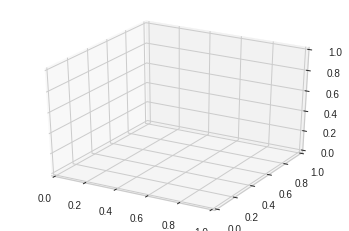

In [68]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')


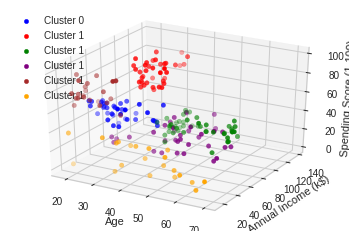

In [69]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 0]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 0]['Annual Income (k$)'],
    cluster_df.loc[cluster_df['Cluster'] == 0]['Spending Score (1-100)'],
    c='blue', label = 'Cluster 0'
)
ax.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 1]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 1]['Annual Income (k$)'],
    cluster_df.loc[cluster_df['Cluster'] == 1]['Spending Score (1-100)'],
    c='red', label = 'Cluster 1'
)

ax.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 2]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 2]['Annual Income (k$)'],
    cluster_df.loc[cluster_df['Cluster'] == 2]['Spending Score (1-100)'],
    c='green', label = 'Cluster 1'
)
ax.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 3]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 3]['Annual Income (k$)'],
    cluster_df.loc[cluster_df['Cluster'] == 3]['Spending Score (1-100)'],
    c='purple', label = 'Cluster 1'
)

ax.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 4]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 4]['Annual Income (k$)'],
    cluster_df.loc[cluster_df['Cluster'] == 4]['Spending Score (1-100)'],
    c='brown', label = 'Cluster 1'
)

ax.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 5]['Age'], 
    cluster_df.loc[cluster_df['Cluster'] == 5]['Annual Income (k$)'],
    cluster_df.loc[cluster_df['Cluster'] == 5]['Spending Score (1-100)'],
    c='orange', label = 'Cluster 1'
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend(loc = 'upper left')

plt.show()


# Silhouette

In [70]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [71]:
for n_cluster in [2]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    )
    silhouette_avg = silhouette_score(
        customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.2932


In [72]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) 
        visualizer.poof() 
        print(visualizer.silhouette_score_)
        
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

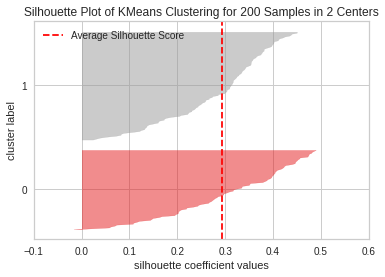

0.29290342149608906


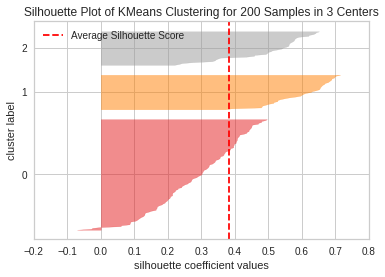

0.38338076351539585


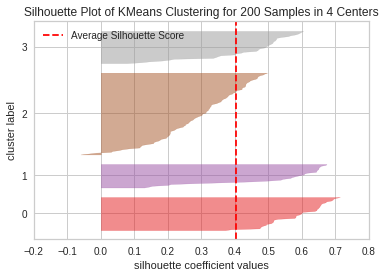

0.40513418038281196


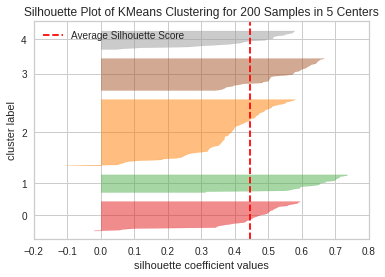

0.4457836757834167


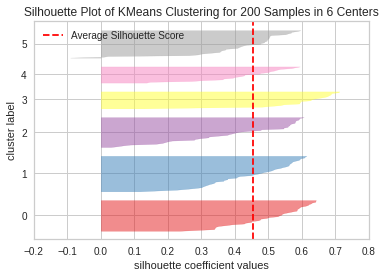

0.45378114904396816


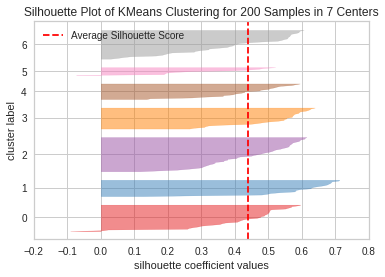

0.44118407482047045


In [73]:
scores=silhouette_plot(cluster_df, 2, 7)